### belkacem dounia




# **TP06 : Détection de Contours avec le Filtre de Kirsch et Seuillage Automatique d’Otsu**

---

## **1. Objectif**

L’objectif de ce TP est d’implémenter la détection de contours dans une image en niveaux de gris à l’aide du **filtre de Kirsch** (8 directions) puis de réaliser une **binarisation automatique** des contours détectés grâce à la méthode d’Otsu.  
On souhaite ainsi extraire efficacement les bords principaux d’une image, étape essentielle en analyse et reconnaissance d’images.

---

## **2. Méthodologie**

### **2.1. Filtre de Kirsch (détection de contours)**

- Le **filtre de Kirsch** utilise 8 masques directionnels pour détecter les variations d’intensité maximales dans toutes les directions (Nord, Nord-Est, Est, etc.).
- Pour chaque pixel, on applique les 8 masques et on conserve la réponse maximale, ce qui permet de détecter les contours quelle que soit leur orientation.

### **2.2. Seuillage automatique par la méthode d’Otsu**

- La **méthode d’Otsu** permet de calculer automatiquement un seuil optimal pour séparer les pixels de contour (forte variation) des pixels de fond.
- On applique ce seuil à l’image issue du filtre de Kirsch pour obtenir une image binaire des contours.

---

## **3. Résultats**



- Le filtre de Kirsch met en évidence les bords principaux de l’image, avec une intensité proportionnelle à la force du contour.
- Le seuillage d’Otsu transforme cette carte de contours en une image binaire, facilitant l’extraction des objets ou des formes.

---

## **4. Conclusion**

La combinaison du **filtre de Kirsch** (pour la détection multi-directionnelle des contours) et du **seuillage automatique d’Otsu** (pour la binarisation) permet d’obtenir une détection de bords robuste et automatisée.  




Seuil automatique (Otsu) = 111


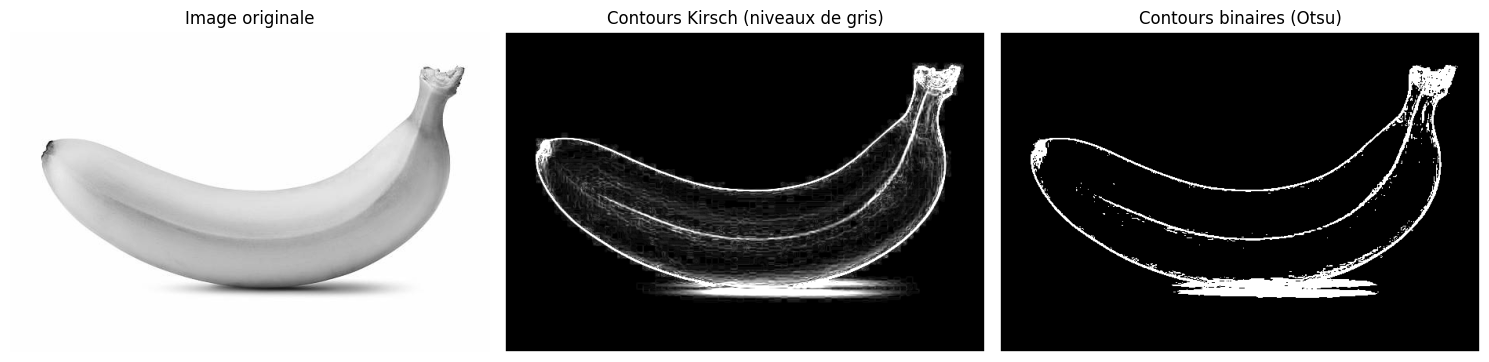

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
# --- Étape 1 : Charger et convertir l'image ---
image_path = r"C:\Users\DELL\Desktop\tp_tim\pics\bananapic.jpg"
image = Image.open(image_path).convert('L')
image_array = np.array(image)

# --- Étape 2 : Définir les 8 masques de Kirsch ---
kirsch_kernels = [
    np.array([[ 5,  5,  5],
              [-3,  0, -3],
              [-3, -3, -3]]),  # Nord
    np.array([[ 5,  5, -3],
              [ 5,  0, -3],
              [-3, -3, -3]]),  # Nord-Est
    np.array([[ 5, -3, -3],
              [ 5,  0, -3],
              [ 5, -3, -3]]),  # Est
    np.array([[-3, -3, -3],
              [ 5,  0, -3],
              [ 5,  5, -3]]),  # Sud-Est
    np.array([[-3, -3, -3],
              [-3,  0, -3],
              [ 5,  5,  5]]),  # Sud
    np.array([[-3, -3, -3],
              [-3,  0,  5],
              [-3,  5,  5]]),  # Sud-Ouest
    np.array([[-3, -3,  5],
              [-3,  0,  5],
              [-3, -3,  5]]),  # Ouest
    np.array([[-3,  5,  5],
              [-3,  0,  5],
              [-3, -3, -3]])   # Nord-Ouest
]

# --- Étape 3 : Appliquer le filtre de Kirsch ---
def apply_kirsch_filter(image, kernels):
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)
    rows, cols = image.shape
    responses = []

    for kernel in kernels:
        response = np.zeros_like(image, dtype=np.float32)
        for i in range(1, rows + 1):
            for j in range(1, cols + 1):
                region = padded_image[i-1:i+2, j-1:j+2]
                value = np.sum(region * kernel)
                response[i-1, j-1] = value
        responses.append(response)

    final_response = np.maximum.reduce(responses)
    return np.clip(final_response, 0, 255).astype(np.uint8)

# --- Étape 4 : Méthode d'Otsu pour le seuillage automatique ---
def otsu_threshold(image):
    histogram, _ = np.histogram(image, bins=256, range=(0, 256))
    total_pixels = image.size

    current_max = 0
    threshold = 0
    sum_total = np.dot(np.arange(256), histogram)
    sum_background = 0
    weight_background = 0

    for t in range(256):
        weight_background += histogram[t]
        if weight_background == 0:
            continue

        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break

        sum_background += t * histogram[t]

        mean_background = sum_background / weight_background
        mean_foreground = (sum_total - sum_background) / weight_foreground

        between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        if between_class_variance > current_max:
            current_max = between_class_variance
            threshold = t

    return threshold

# --- Étape 5 : Binariser l'image selon un seuil ---
def binarize_image(image, threshold):
    binary_image = np.where(image > threshold, 255, 0).astype(np.uint8)
    return binary_image

# --- Application du filtre et de la binarisation ---
kirsch_edges = apply_kirsch_filter(image_array, kirsch_kernels)
threshold = otsu_threshold(kirsch_edges)
print(f"Seuil automatique (Otsu) = {threshold}")
binary_edges = binarize_image(kirsch_edges, threshold)

# --- Affichage des résultats ---
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

axes[0].imshow(image_array, cmap='gray')
axes[0].set_title("Image originale")
axes[0].axis('off')

axes[1].imshow(kirsch_edges, cmap='gray')
axes[1].set_title("Contours Kirsch (niveaux de gris)")
axes[1].axis('off')

axes[2].imshow(binary_edges, cmap='gray')
axes[2].set_title(f"Contours binaires (Otsu)")
axes[2].axis('off')

plt.tight_layout()
plt.show()




